In [139]:
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [96]:
%matplotlib inline

In [97]:
def generate_matrix(n):
    a = np.random.random_integers(0, 10, n*n).reshape(n, n)
    return a

### Testing size complexity

In [109]:
#with open('size_test_input.txt', 'w') as outtxt:
#    for i in range(1, 13):
#        data = generate_matrix(i)
#        print np.linalg.det(data)
#        outtxt.write('{}\n'.format(i))
#        outtxt.write('{}\n'.format(data).replace('[', ' ').replace(']',' '))
#        outtxt.write('\n')

2.0
-8.0
29.0
-186.0
13505.0
-187870.0
1280768.0
300120.0
8100487.0
-242715571.0
-6878435498.0
21972889299.0
508075138295.0


In [193]:
def parse_input(filename):
    orders = []
    times = []
    
    for line in open(filename).readlines():
        if line.startswith('Order'):
            line = line.split()
            orders.append(line[1])
            times.append(line[3].rstrip('ns'))
            
    orders = np.array(map(int, orders))
    times = map(int, times)
    times = np.array([item/(10.**9) for item in times])
    
    indx = np.argsort(orders)
    orders = orders[indx]
    times = times[indx]
    
    return orders[:-1], times[:-1]

In [194]:
def exp_func(x, a, b, c):
    return a*10**(b*np.array(x)) + c

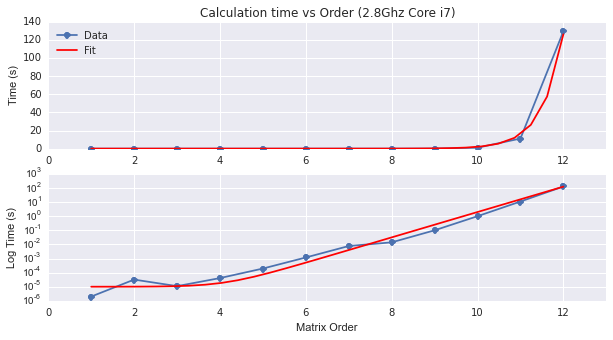

In [240]:
fig = plt.figure(figsize=(10, 5))

orders, times = parse_input('../output/size_test_output.txt')
xvals = np.linspace(min(orders), max(orders), 30)
p0=[2e-9, .9, 1e-05]
popt, pcov = curve_fit(exp_func, orders, times, p0=p0)

#-- Linear plot
ax = fig.add_subplot(2, 1, 1)
ax.plot(orders, times, marker='o', label='Data')
#ax.plot(xvals, exp_func(xvals, *popt), color='y')
ax.plot(xvals, exp_func(xvals, *p0), color='r', label='Fit')
ax.set_title("Calculation time vs Order (2.8Ghz Core i7)")
ax.set_ylabel("Time (s)")
ax.set_xlim(0, 13)
ax.legend(shadow=True, numpoints=1, loc='best')
#-- Log plot

ax2 = fig.add_subplot(2, 1, 2)
ax2.semilogy(orders, times, marker='o')
#ax2.semilogy(xvals, exp_func(xvals, *popt), color='y')
ax2.semilogy(xvals, exp_func(xvals, *p0), color='r')
ax2.set_ylabel("Log Time (s)")
ax2.set_xlim(0, 13)
ax2.set_xlabel("Matrix Order")

fig.savefig('complexity.pdf')